In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
dataset = pd.read_excel(r'PredData.xlsx',sheet_name='heatmap', index_col='YEAR')
dat1 = pd.read_excel(r'PredData.xlsx',sheet_name='heatmap')

In [42]:
dataset.head()


,District,Homicide/Murder,Causing_Death_by_Negligence,Hurt,Assault_on_Women_with_intent_to_outrage_her_Modesty,Kidnapping_&_Abduction_Total,HumanTrafficking,Rape,Offences_against_State,Miscellanious,Other_IPC_crimes,Total,Population,Crime Rate,Latitude,Longitude
YEAR,,,,,,,,,,,,,,,,
2014,Ahmednagar,189,736,199,541,121,0,104,0,3954,1113,6957,4543159,153.131334,19.094829,74.747979
2014,Akola,105,141,121,375,42,0,53,0,1872,1724,4433,1813906,244.389731,20.700216,77.008168
2014,Amravati,197,319,338,897,112,0,130,0,4122,4171,10286,2888445,356.108564,20.931982,77.752304
2014,Aurangabad,202,481,148,794,100,0,58,0,5074,2201,9058,3701282,244.726017,19.876165,75.343314
2014,Beed,170,304,121,590,72,0,70,0,2381,1156,4864,2585049,188.158909,18.990088,75.753132


In [43]:
dataset = dataset.drop(['Crime Rate','Population','Latitude','Longitude'], axis=1)
dat1 = dat1.drop(['Crime Rate','Population','Latitude','Longitude'], axis=1)

In [44]:
dataset = dataset.dropna()
print('shape of dataset',dataset.shape)
dataset.head()

shape of dataset (245, 12)


,District,Homicide/Murder,Causing_Death_by_Negligence,Hurt,Assault_on_Women_with_intent_to_outrage_her_Modesty,Kidnapping_&_Abduction_Total,HumanTrafficking,Rape,Offences_against_State,Miscellanious,Other_IPC_crimes,Total
YEAR,,,,,,,,,,,,
2014,Ahmednagar,189,736,199,541,121,0,104,0,3954,1113,6957
2014,Akola,105,141,121,375,42,0,53,0,1872,1724,4433
2014,Amravati,197,319,338,897,112,0,130,0,4122,4171,10286
2014,Aurangabad,202,481,148,794,100,0,58,0,5074,2201,9058
2014,Beed,170,304,121,590,72,0,70,0,2381,1156,4864


In [45]:
dist=dat1['District']
#dist=dist.drop(['YEAR'],axis=2)
dist

0      Ahmednagar
1           Akola
2        Amravati
3      Aurangabad
4            Beed
          ...    
240       Solapur
241         Thane
242        Wardha
243        Washim
244      Yavatmal
Name: District, Length: 245, dtype: object

In [46]:
dist1=dist.unique()
dist1

array(['Ahmednagar', 'Akola', 'Amravati', 'Aurangabad', 'Beed',
       'Bhandara', 'Buldhana', 'Chandrapur', 'Dhule', 'Gadchiroli',
       'Gondia', 'Hingoli', 'Jalgaon', 'Jalna', 'Kolhapur', 'Latur',
       'Mumbai', 'Nagpur', 'Nanded', 'Nandurbar', 'Nasik', 'Navi Mumbai',
       'Osmanabad', 'Parbhani', 'Pune', 'Raigad', 'Ratnagiri', 'Sangli',
       'Satara', 'Sindhudurg', 'Solapur', 'Thane', 'Wardha', 'Washim',
       'Yavatmal', 'Aurangbad'], dtype=object)

In [159]:
for i in dist1:
   # if (dataset.loc(0) == "Ahmednagar"):
    newdata=dataset.iloc[:, lambda df: [11]].where(dataset['District']=='Pune')
#df['Comedy_Score'].where(df['Rating_Score'] < 50)
#df.loc[df['first_name']=='Mihir']

In [160]:
newdata=newdata.dropna()
newdata
#newdata=dataset.iloc[:, lambda df: [0,11]].where(dataset['District']=='Ahmednagar')

,Total
YEAR,
2014,25478.0
2015,27932.0
2016,26933.0
2017,29809.0
2018,37638.0
2019,38303.0
2020,55814.0


<AxesSubplot:xlabel='YEAR'>

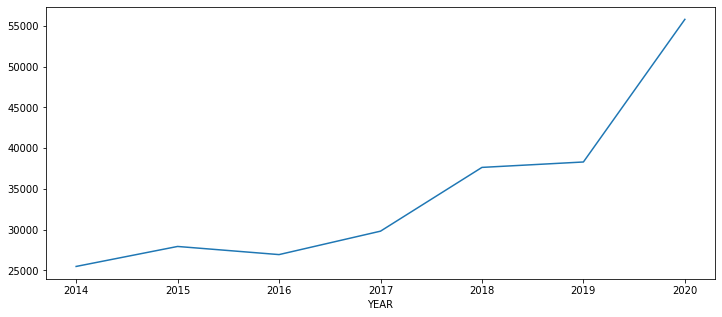

In [161]:
newdata['Total'].plot(figsize=(12,5))

In [162]:
from statsmodels.tsa.stattools import adfuller
def ad_test(newdata):
     dftest = adfuller(newdata, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(newdata['Total'])

1. ADF :  2.444817411214909
2. P-Value :  0.9990298641757719
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 5
5. Critical Values :
	 1% :  -6.045114
	 5% :  -3.9292800000000003
	 10% :  -2.98681


In [163]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [164]:
stepwise_fit = auto_arima(newdata['Total'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=152.631, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=166.086, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=168.720, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.233 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    7
Model:                        SARIMAX   Log Likelihood                 -74.316
Date:                Fri, 07 Apr 2023   AIC                            152.631
Time:                        15:52:59   BIC                            152.523
Sample:                             0   HQIC                           151.294
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.456e+04   6202.940      5.571      0.000    2.24e+04    4.67e+04
sigma2      9.748e+07   8.14e+07      1.197      0.231   -6.21e+07    2.57e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.29   Prob(JB):                         0.43
Heteroskedasticity (H):               3.69   Skew:                             1.20
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [176]:
print(newdata.shape)
train=newdata.iloc[:5]
test=newdata.iloc[5:]
print(train.shape,test.shape)


(7, 1)
(5, 1) (2, 1)


In [195]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Total'],order=(1,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                    5
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -38.939
Date:                Fri, 07 Apr 2023   AIC                             81.878
Time:                        16:04:03   BIC                             80.650
Sample:                             0   HQIC                            79.184
                                  - 5                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1279      0.640      0.200      0.842      -1.126       1.382
sigma2      1.708e+07   3.05e-08    5.6e+14      0.000    1.71e+07    1.71e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.52   Prob(JB):                         0.79
Heteroskedasticity (H):                nan   Skew:                             0.53
Prob(H) (two-sided):                   nan   Kurtosis:                         1.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.08e+30. Standard errors may be unstable.
"""

2019    38786.145229
2020    38786.145229
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='YEAR'>

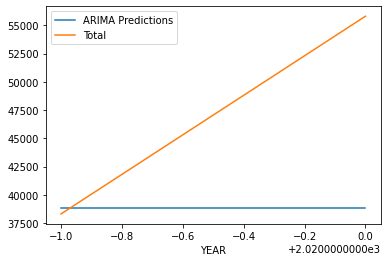

In [196]:
#start=len(train)
#end=len(train)+len(test)-1
pred=model.predict(start=2019,end=2020,typ='levels').rename('ARIMA Predictions')
print(pred)
pred.plot(legend=True)
test['Total'].plot(legend=True)

In [190]:
model_predictions=[]
n1=len(test)


In [158]:
for i in range(n1):
    model=ARIMA(train,order=(4,1,0))
    model_fit=model.fit()
    output = model_fit.forecast()
    yhat=output[6].astype(int)
    model_predictions.append(yhat)
    actual_test_value=test.loc[i]
    train.append(actual_test_value)
    #print(output)
    #print(output[6])
    break

KeyError: 0

TypeError: 'numpy.int32' object is not iterable